# Data Loading

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
trades = pd.read_csv("/content/historical_data.csv")
sentiment = pd.read_csv("/content/fear_greed_index.csv")

# Preview
trades.head(), sentiment.head()


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

# EDA & Feature Engineering

In [32]:
trades.info()
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [33]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [34]:
sentiment.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [35]:
# Make column names clean & consistent
trades.columns = trades.columns.str.lower().str.replace(" ", "_")
sentiment.columns = sentiment.columns.str.lower().str.replace(" ", "_")

trades.columns, sentiment.columns


(Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
        'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
        'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
        'timestamp'],
       dtype='object'),
 Index(['timestamp', 'value', 'classification', 'date'], dtype='object'))

In [44]:
trades['timestamp'] = pd.to_datetime(trades['timestamp'], unit='ms')
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.normalize()


In [45]:
trades['date'] = trades['timestamp'].dt.normalize()


In [46]:
print(trades['date'].min(), trades['date'].max())
print(sentiment['date'].min(), sentiment['date'].max())


2023-03-28 00:00:00 2025-06-15 00:00:00
2018-02-01 00:00:00 2025-05-02 00:00:00


In [47]:
trades = trades.dropna(subset=['closed_pnl'])

In [48]:
trades['is_loss'] = trades['closed_pnl'] < 0
trades['trade_size_usd'] = trades['size_usd']

In [49]:
merged = pd.merge(
    trades,
    sentiment[['date', 'classification']],
    on='date',
    how='inner'
)

merged.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,is_loss,trade_size_usd,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,False,7872.16,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,False,127.68,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,False,1150.63,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,False,1142.04,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,False,69.75,Greed


# Analysis

In [50]:
merged.groupby('classification')['closed_pnl'].mean()

,closed_pnl
classification,
Extreme Greed,25.418772
Fear,50.047622
Greed,87.894859
Neutral,22.229713


In [51]:
merged.groupby('classification')['is_loss'].mean()

,is_loss
classification,
Extreme Greed,0.132146
Fear,0.066930
Greed,0.079170
Neutral,0.076600


In [52]:
merged.groupby('classification')['trade_size_usd'].mean()

,trade_size_usd
classification,
Extreme Greed,5660.265764
Fear,5259.977837
Greed,3182.883845
Neutral,3058.848110


In [53]:
import os

os.makedirs("outputs", exist_ok=True)
os.makedirs("csv_files", exist_ok=True)

# Visualizations

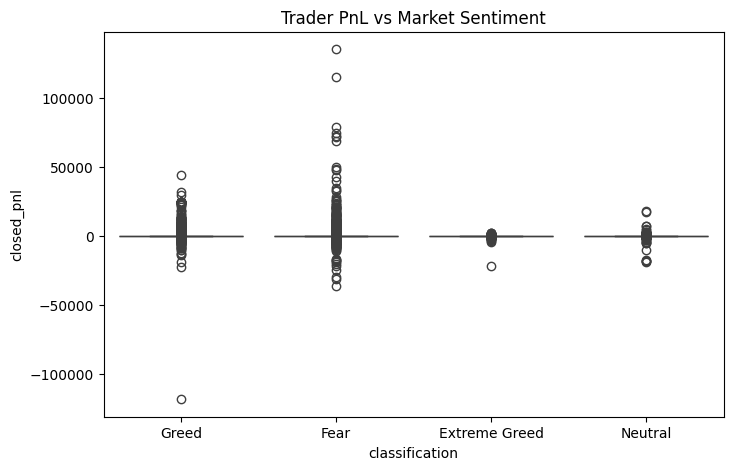

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='closed_pnl', data=merged)
plt.title("Trader PnL vs Market Sentiment")
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()

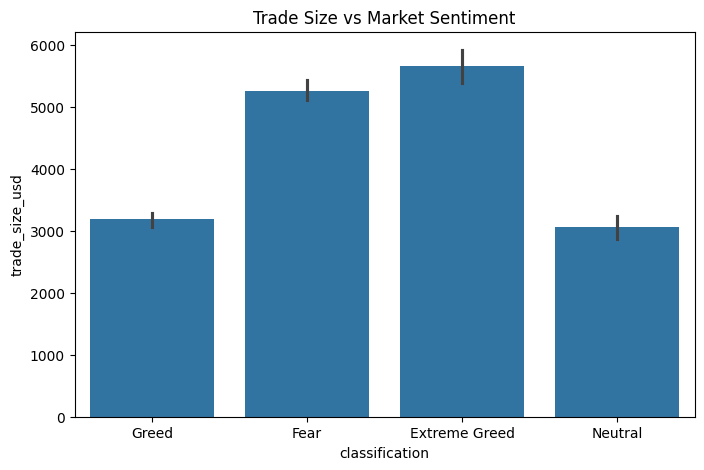

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x='classification', y='trade_size_usd', data=merged)
plt.title("Trade Size vs Market Sentiment")
plt.savefig("outputs/trade_size_vs_sentiment.png")
plt.show()


In [57]:
merged.shape
merged['classification'].value_counts()


,count
classification,
Fear,133871
Greed,36289
Neutral,7141
Extreme Greed,6962


In [58]:
merged.groupby('classification')['closed_pnl'].mean()
merged.groupby('classification')['is_loss'].mean()
merged.groupby('classification')['trade_size_usd'].mean()


,trade_size_usd
classification,
Extreme Greed,5660.265764
Fear,5259.977837
Greed,3182.883845
Neutral,3058.848110


In [59]:
merged.to_csv("csv_files/processed_data.csv", index=False)